# Comparative Analysis
In this notebook, we compare Matrix Profile Discord Discovery with different window size detection techniques.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [3]:
wsd = ["Human", "FFT", "ACF", "SuSS", "MWF", "Autoperiod", "RobustPeriod"] # 

methods = list()

for algo in wsd:
    candidate_name = f"discord_{algo}"
    methods.append((algo, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/anomaly_detection/discord/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df.match
    
df_scores

,name,Human,FFT,ACF,SuSS,MWF,Autoperiod,RobustPeriod
0,DISTORTED1sddb40,True,True,True,False,True,True,True
1,DISTORTED2sddb40,True,True,True,True,True,True,True
2,DISTORTED3sddb40,False,False,False,True,False,False,True
3,DISTORTEDBIDMC1,True,True,True,True,True,True,False
4,DISTORTEDCIMIS44AirTemperature1,False,False,False,False,False,False,False
5,DISTORTEDCIMIS44AirTemperature2,False,False,False,True,True,False,False
6,DISTORTEDCIMIS44AirTemperature3,True,True,True,True,False,True,True
7,DISTORTEDCIMIS44AirTemperature4,False,False,False,False,False,False,True
8,DISTORTEDCIMIS44AirTemperature5,True,True,True,True,True,True,False
9,DISTORTEDCIMIS44AirTemperature6,True,True,True,True,True,True,True


Let's calculate the mean/std score.

In [4]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4123/3278697802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


Human           0.484
FFT             0.476
ACF             0.540
SuSS            0.448
MWF             0.536
Autoperiod      0.536
RobustPeriod    0.328
dtype: float64

In [5]:
df_scores.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4123/4283968224.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0)


Human           0.500746
FFT             0.500426
ACF             0.499397
SuSS            0.498286
MWF             0.499703
Autoperiod      0.499703
RobustPeriod    0.470427
dtype: float64

Let's compute the wins per method.

In [6]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [7]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

Human:wins=184 rank=1.888
FFT:wins=182 rank=1.724
ACF:wins=198 rank=1.484
SuSS:wins=175 rank=2.092
MWF:wins=197 rank=1.572
Autoperiod:wins=197 rank=1.468
RobustPeriod:wins=145 rank=2.572


Let's plot and output the ranks.

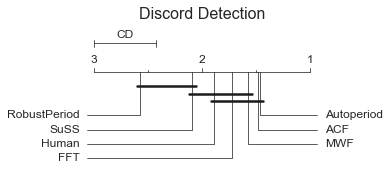

In [7]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, highv=3, width=5, reverse=True, textspace=1, )
plt.title("Discord Detection", fontsize=16)
plt.show()

Let's compute wins/losses against Human.

In [8]:
selection = "Human"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

Human vs FFT: (wins/ties/losses): 36/180/34
Human vs ACF: (wins/ties/losses): 30/176/44
Human vs SuSS: (wins/ties/losses): 43/173/34
Human vs MWF: (wins/ties/losses): 33/171/46
Human vs Autoperiod: (wins/ties/losses): 29/179/42
Human vs RobustPeriod: (wins/ties/losses): 61/167/22


Lets plot the correlation of the window sizes from different techniques.

In [9]:
window_sizes = pd.read_csv("../experiments/anomaly_detection/window_sizes.csv")

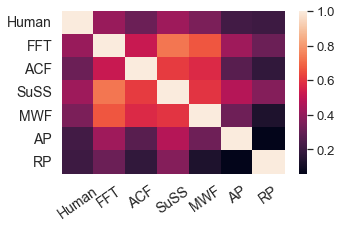

In [11]:
font_size = 14
_, ax = plt.subplots(figsize=(5,3))

from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr

W = [window_sizes.iloc[:,i].to_numpy() for i in range(2,window_sizes.columns.shape[0])]
L = list(window_sizes.columns[2:])

for idx, l in enumerate(L):
    if l == "Autoperiod":
        L[idx] = "AP"
    if l == "RobustPeriod":
        L[idx] = "RP"

corr = pairwise_distances(W, metric=lambda x,y: pearsonr(x,y)[0])

sns.set(font_scale=1.2)
ax = sns.heatmap(corr)

ax.set_xticklabels(L, rotation=35, fontsize=font_size)
ax.set_yticklabels(L, rotation=0, fontsize=font_size)

plt.show()